In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import norm, rankdata
import warnings
warnings.filterwarnings('ignore')

# Enter 2 columns of B (before), A (after)
A = [117.1, 121.3, 127.8, 121.9, 117.4, 124.5, 119.5, 115.1]
B = [123.5, 125.3, 126.5, 127.9, 122.1, 125.6, 129.8, 117.2]

dt = {'Pooled': sorted(A + B)}
df = pd.DataFrame(dt)
df['Sample'] = df['Pooled'].apply(lambda x: 'A' if x in A else 'B')
df['Rank'] = rankdata(df['Pooled'])
df['A_Ranks'] = df.apply(lambda X: X['Rank'] if X.Sample=='A' else 0, axis=1)
df['#(Ai > Bj)'] = [np.count_nonzero(df['A_Ranks'].values[0:k]==0) for k in range(len(df))]
df['#(Ai > Bj)'] = df.apply(lambda X: 0 if X['A_Ranks']==0 else X['#(Ai > Bj)'], axis=1)
df

,Pooled,Sample,Rank,A_Ranks,#(Ai > Bj)
0,115.1,A,1.0,1.0,0
1,117.1,A,2.0,2.0,0
2,117.2,B,3.0,0.0,0
3,117.4,A,4.0,4.0,1
4,119.5,A,5.0,5.0,1
5,121.3,A,6.0,6.0,1
6,121.9,A,7.0,7.0,1
7,122.1,B,8.0,0.0,0
8,123.5,B,9.0,0.0,0
9,124.5,A,10.0,10.0,3


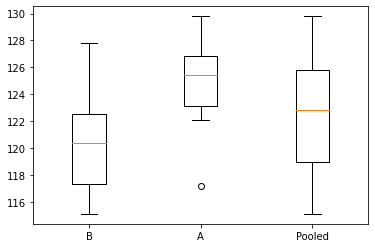

In [2]:
plt.boxplot([A, B, df.Pooled], labels=['B', 'A', 'Pooled']);

#### 1. Wilcoxon Rank-Sum

In [3]:
# The mean and the std of A_Ranks, under H0: A distribution = B distribution
m, n = len(A), len(B)
mean = m * (m + n + 1) / 2
std_ = (n * mean / 6)**0.5
round(mean, 3), round(std_, 3)

(68.0, 9.522)

In [4]:
# Set significant level alpha, one tail or two tails.
alpha = 0.05
two_tails = True

# Compute the Z statistic value
if two_tails:
    Z_alpha = norm.ppf(1 - alpha/2) 
else:
    Z_alpha = norm.ppf(1 - alpha) 

round(Z_alpha, 3)

1.96

In [5]:
# Compute the (1 - alpha) * 100% confidence interval
ci = (mean - Z_alpha * std_, mean + Z_alpha * std_)
round(ci[0], 3), round(ci[1], 3)

(49.337, 86.663)

In [6]:
# Compute the Z statistic:
A_Ranks_Sum = df['A_Ranks'].sum()
Z_null = abs(A_Ranks_Sum - mean) / std_
A_Ranks_Sum, round(Z_null, 3)

(49.0, 1.995)

In [7]:
# Evaluate the rejection of H0
if Z_null > Z_alpha:
    print('The test statistic is statistically significant. H0 should be rejected!')
else:
    print('The test statistic is not statistically significant. H0 cannot be rejected!')

The test statistic is statistically significant. H0 should be rejected!


In [8]:
p_value = 1 - norm.cdf(Z_null)

if two_tails:
    print(round(2 * p_value, 3))
else:
    print(round(p_value, 3))

0.046


In [9]:
# Other way to compute the p_value using the survival function of stats
p_value = norm.sf(Z_null)

if two_tails:
    print(round(2 * p_value, 3))
else:
    print(round(p_value, 3))

0.046


#### 2. Mann-Whitney U Test

In [10]:
# Compute the mean and std of #(Ai > Bj)
m, n = len(A), len(B)
mean = m * n / 2
std_ = ((m + n + 1) * mean / 6)**0.5
round(mean, 3), round(std_, 3)

(32.0, 9.522)

In [11]:
# Set significant level alpha, one tail or two tails.
alpha = 0.05
two_tails = True

# Compute the Z statistic value
if two_tails:
    Z_alpha = norm.ppf(1 - alpha/2) 
else:
    Z_alpha = norm.ppf(1 - alpha) 

round(Z_alpha, 3)

1.96

In [12]:
# Compute the (1 - alpha) * 100% confidence interval
ci = (mean - Z_alpha * std_, mean + Z_alpha * std_)
round(ci[0], 3), round(ci[1], 3)

(13.337, 50.663)

In [13]:
# Asumme H0 is true, hence the Z statistic:
U_sum = df['#(Ai > Bj)'].sum()
Z_null = abs(U_sum - mean) / std_
U_sum, round(Z_null, 3)

(13, 1.995)

In [14]:
# Evaluate the rejection of H0
if Z_null > Z_alpha:
    print('The test statistic is statistically significant. H0 should be rejected!')
else:
    print('The test statistic is not statistically significant. H0 cannot be rejected!')

The test statistic is statistically significant. H0 should be rejected!


In [15]:
p_value = 1 - norm.cdf(Z_null)

if two_tails:
    print(round(2 * p_value, 3))
else:
    print(round(p_value, 3))

0.046


In [16]:
# Other way to compute the p_value using the survival function of stats
p_value = norm.sf(Z_null)

if two_tails:
    print(round(2 * p_value, 3))
else:
    print(round(p_value, 3))

0.046
